# Machine Learning

## 1) Creando Set de Entrenamiento

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

%matplotlib inline
plt.style.use('default')

In [2]:
#Capitales de los Estados de México
capitales=['Aguascalientes','Mexicali','La Paz','Campeche','Tuxtla Gutiérrez','Chihuahua','Saltillo','Colima','Durango','Guanajuato','Chilpancingo de los Bravo','Pachuca','Guadalajara','Toluca','Morelia','Cuernavaca','Tepic','Monterrey','Oaxaca de Juárez','Puebla','Querétaro','Chetumal','San Luis Potosí','Culiacán','Hermosillo','Villahermosa','Victoria','Tlaxcala','Xalapa','Mérida','Zacatecas','Cuauhtémoc']

In [3]:
metropolitana=['Azcapotzalco','Coyoacán','Cuajimalpa de Morelos','Gustavo A. Madero','Iztacalco','Iztapalapa','La Magdalena Contreras','Milpa Alta','Alvaro Obregón','Tláhuac','Tlalpan','Xochimilco','Benito Juárez','Cuauhtémoc','Miguel Hidalgo','Venustiano Carranza','Tizayuca','Acolman','Amecameca','Atenco','Atizapán de Zaragoza','Atlautla','Axapusco','Ayapango','Coacalco de Berriozábal','Cocotitlán','Coyotepec','Cuautitlán','Chalco','Chiautla','Chicoloapan','Chiconcuac','Chimalhuacán','Ecatepec de Morelos','Ecatzingo','Huehuetoca','Huixquilucan','Isidro Fabela','Ixtapaluca','Jaltenco','Jilotzingo','Melchor Ocampo','Naucalpan de Juárez','Nezahualcóyotl','Nextlalpan','Nicolás Romero','Nopaltepec','Otumba','Ozumba','Papalotla','La Paz','San Martín de las Pirámides','Tecámac','Temamatla','Temascalapa','Tenango del Aire','Teoloyucan','Teotihuacán','Tepetlaoxtoc','Tepetlixpa','Tepotzotlán','Tequixquiac','Texcoco','Tezoyuca','Tlalmanalco','Tlalnepantla de Baz','Tultepec','Tultitlán','Villa del Carbón','Zumpango','Cuautitlán Izcalli','Valle de Chalco Solidaridad','Tonanitla']

In [136]:
data={'provincia':['Baja California Sur','Baja California Norte','Chihuahua','Durango','Sinaloa','Sonora','Coahuila','Nuevo León','Tamaulipas','Nayarit','Jalisco','Colima','Michoacán','Puebla','Veracruz','Tlaxcala','Hidalgo','Aguascalientes','Guanajuato','San luis Potosí','Zacatecas','Querétaro','Morelos','Edo. de México','Distrito Federal','Guerrero','Oaxaca','Chiapas','Tabasco','Campeche','Quintana Roo','Yucatán'], 'Zona':['nor_oeste','nor_oeste','nor_oeste','nor_oeste','nor_oeste','nor_oeste','nor_este','nor_este','nor_este','occidente','occidente','occidente','occidente','oriente','oriente','oriente','oriente','centro_norte','centro_norte','centro_norte','centro_norte','centro_norte','centro_sur','centro_sur','centro_sur','sur_oeste','sur_oeste','sur_oeste','sur_este','sur_este','sur_este','sur_este']}

In [137]:
zonas_df=pd.DataFrame(data)
zonas_df

,Zona,provincia
0,nor_oeste,Baja California Sur
1,nor_oeste,Baja California Norte
2,nor_oeste,Chihuahua
3,nor_oeste,Durango
4,nor_oeste,Sinaloa
5,nor_oeste,Sonora
6,nor_este,Coahuila
7,nor_este,Nuevo León
8,nor_este,Tamaulipas
9,occidente,Nayarit


In [8]:
#Función que establece si una ciudad se encuentra en la capital del estado
def EstaEnCapital(Ciudad):
    for capital in capitales:
        if(Ciudad==capital):
            return 1
    return 0

In [9]:
#Función que establece si una ciudad se encuentra en la zona metropolitana
def EstaEnZonaMetropolitana(Ciudad):
    for ciudad_metropolitana in metropolitana:
        if(Ciudad==ciudad_metropolitana):
            return 1
    return 0

In [10]:
def oneHotEncoding(df, columna):
    one_hot = pd.get_dummies(df[columna])
    df.drop(columna, axis=1, inplace=True)
    df = pd.concat([df, one_hot], axis=1)
    return df

In [11]:
#Creamos una función que según el mes y el dia, nos devuelve en que estación se encuentra
def fechaEstacion(mes,dia):
    if((mes==1) | (mes==2)):
        return 'Invierno'
    if(mes==3):
        if(dia<21):
            return 'Invierno'
        if(dia>=21):
            return 'Primavera'
    if((mes==4) | (mes==5)):
        return 'Primavera'
    if(mes==6):
        if(dia<21):
            return 'Primavera'
        if(dia>=21):
            return 'Verano'
    if((mes==7) | (mes==8)):
        return 'Verano'
    if(mes==9):
        if(dia<21):
            return 'Verano'
        if(dia>=21):
            return 'Otonio'
    if((mes==10) | (mes==11)):
        return 'Otonio'
    if(mes==12):
        if(dia<21):
            return 'Otonio'
        if(dia>=21):
            return 'Invierno'

In [271]:
train=pd.read_csv('train.csv')
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [272]:
#ESTO NO LO ESTUVE USANDO
precio_promedio_provincia=train.groupby(['provincia']).agg({'precio':'mean'}).reset_index()
precio_promedio_provincia.rename(columns={'precio':'precio_promedio_provincia'},inplace=True)
precio_promedio_provincia.head()

,provincia,precio_promedio_provincia
0,Aguascalientes,1.477189e+06
1,Baja California Norte,7.674418e+05
2,Baja California Sur,1.216453e+06
3,Campeche,1.570918e+06
4,Chiapas,1.924126e+06


In [34]:
train=pd.merge(train,precio_promedio_provincia,on='provincia',how='left')
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_promedio_provincia
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0,3.471705e+06
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0,3.471705e+06
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0,2.367694e+06
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0,2.762465e+06
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0,2.367694e+06


In [139]:
train.dropna(subset=['tipodepropiedad','provincia'],inplace=True)

In [140]:
group=train.groupby(['ciudad']).agg({'precio':'mean'}).sort_values('precio',ascending=False)
top_ciudades_caras=group.head(30).index

In [141]:
#Genero las columnas para las 30 ciudades
for ciudad in top_ciudades_caras:
    one_hot = pd.get_dummies(train['ciudad']==ciudad)
    one_hot.drop(columns={False},inplace=True)
    one_hot.rename(columns={True:ciudad},inplace=True)
    train = pd.concat([train, one_hot], axis=1)

In [142]:
provincias_precio=train[['provincia','precio']]
provincias_precio_zona=pd.merge(provincias_precio,zonas_df,on='provincia',how='inner')
train=pd.merge(train,zonas_df,on='provincia',how='inner')
precio_zona=provincias_precio_zona.groupby(['Zona']).agg({'precio':'mean'}).reset_index()
precio_zona.rename(columns={'precio':'precio_zona'},inplace=True)
train=pd.merge(train,precio_zona,on='Zona',how='inner')
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,Cacalchén,Villa Victoria,Ahuacatlán,Rafael Lucio,Huixquilucan,Atempan,Otumba,Huimanguillo,Zona,precio_zona
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,0,0,0,0,0,0,0,0,centro_sur,3.117264e+06
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,0,0,0,0,0,0,0,0,centro_sur,3.117264e+06
2,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,0,0,0,0,0,0,0,0,centro_sur,3.117264e+06
3,130216,casa matias romero - sión bancaria,flamante casa habitación en condominio horizon...,Casa,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,20.0,NaN,0.0,...,0,0,0,0,0,0,0,0,centro_sur,3.117264e+06
4,73348,"oportunidad, departamento col del valle, 3 rec...",magnifico departamento con excelente distribuc...,Apartamento,Pazaje Santa Cruz,Benito Juárez,Distrito Federal,5.0,3.0,2.0,...,0,0,0,0,0,0,0,0,centro_sur,3.117264e+06


In [143]:
distrito=train[(train['provincia']=='Distrito Federal')]
estado=train[(train['provincia']=='Edo. de México')]
jalisco=train[(train['provincia']=='Jalisco')]
queretaro=train[(train['provincia']=='Querétaro')]
nuevo_leon=train[(train['provincia']=='Nuevo León')]
puebla=train[(train['provincia']=='Puebla')]
san_luis=train[(train['provincia']=='San luis Potosí')]
yucatan=train[(train['provincia']=='Yucatán')]
morelos=train[(train['provincia']=='Morelos')]
veracruz=train[(train['provincia']=='Veracruz')]
quintara_roo=train[(train['provincia']=='Quintana Roo')]
chihuahua=train[(train['provincia']=='Chihuahua')]
coahuila=train[(train['provincia']=='Coahuila')]
baja_california_norte=train[(train['provincia']=='Baja California Norte')]
baja_california_sur=train[(train['provincia']=='Baja California Sur')]
sonora=train[(train['provincia']=='Sonora')]
guanajuato=train[(train['provincia']=='Guanajuato')]
guerrero=train[(train['provincia']=='Guerrero')]
hidalgo=train[(train['provincia']=='Hidalgo')]
michoacan=train[(train['provincia']=='Michoacán')]
tamaulipas=train[(train['provincia']=='Tamaulipas')]
durango=train[(train['provincia']=='Durango')]
sinaloa=train[(train['provincia']=='Sinaloa')]
aguascalientes=train[(train['provincia']=='Aguascalientes')]
nayarit=train[(train['provincia']=='Nayarit')]
chiapas=train[(train['provincia']=='Chiapas')]
colima=train[(train['provincia']=='Colima')]
tabasco=train[(train['provincia']=='Tabasco')]
tlaxcala=train[(train['provincia']=='Tlaxcala')]
oaxaca=train[(train['provincia']=='Oaxaca')]
campeche=train[(train['provincia']=='Campeche')]
zacatecas=train[(train['provincia']=='Zacatecas')]

In [144]:
#Por cada provincia devuelvo la latitud promedio
def CambiarLatitud(provincia):
     if(provincia=='Distrito Federal'):
        return distrito['lat'].mean()
     if(provincia=='Edo. de México'):
        return estado['lat'].mean()
     if(provincia=='Jalisco'):
        return jalisco['lat'].mean()
     if(provincia=='Querétaro'):
        return queretaro['lat'].mean()
     if(provincia=='Nuevo León'):
        return nuevo_leon['lat'].mean()
     if(provincia=='Puebla'):
        return puebla['lat'].mean()
     if(provincia=='San luis Potosí'):
        return san_luis['lat'].mean()
     if(provincia=='Yucatán'):
        return yucatan['lat'].mean()
     if(provincia=='Morelos'):
        return morelos['lat'].mean()
     if(provincia=='Veracruz'):
        return veracruz['lat'].mean()
     if(provincia=='Quintana Roo'):
        return quintara_roo['lat'].mean()
     if(provincia=='Chihuahua'):
        return chihuahua['lat'].mean()
     if(provincia=='Coahuila'):
        return coahuila['lat'].mean()
     if(provincia=='Baja California Norte'):
        return baja_california_norte['lat'].mean()
     if(provincia=='Baja California Sur'):
        return baja_california_sur['lat'].mean()
     if(provincia=='Sonora'):
        return sonora['lat'].mean()
     if(provincia=='Guanajuato'):
        return guanajuato['lat'].mean()
     if(provincia=='Guerrero'):
        return guerrero['lat'].mean()
     if(provincia=='Hidalgo'):
        return hidalgo['lat'].mean()
     if(provincia=='Michoacán'):
        return michoacan['lat'].mean()
     if(provincia=='Tamaulipas'):
        return tamaulipas['lat'].mean()
     if(provincia=='Durango'):
        return durango['lat'].mean()
     if(provincia=='Sinaloa'):
        return sinaloa['lat'].mean()
     if(provincia=='Aguascalientes'):
        return aguascalientes['lat'].mean()
     if(provincia=='Nayarit'):
        return nayarit['lat'].mean()
     if(provincia=='Chiapas'):
        return chiapas['lat'].mean()
     if(provincia=='Colima'):
        return colima['lat'].mean()
     if(provincia=='Tabasco'):
        return tabasco['lat'].mean()
     if(provincia=='Tlaxcala'):
        return tlaxcala['lat'].mean()
     if(provincia=='Oaxaca'):
        return oaxaca['lat'].mean()
     if(provincia=='Campeche'):
        return campeche['lat'].mean()
     if(provincia=='Zacatecas'):
        return zacatecas['lat'].mean()
     if(provincia==''):
        return 0

In [145]:
#Por cada provincia devuelvo la longitud promedio
def CambiarLongitud(provincia):
     if(provincia=='Distrito Federal'):
        return distrito['lng'].mean()
     if(provincia=='Edo. de México'):
        return estado['lng'].mean()
     if(provincia=='Jalisco'):
        return jalisco['lng'].mean()
     if(provincia=='Querétaro'):
        return queretaro['lng'].mean()
     if(provincia=='Nuevo León'):
        return nuevo_leon['lng'].mean()
     if(provincia=='Puebla'):
        return puebla['lng'].mean()
     if(provincia=='San luis Potosí'):
        return san_luis['lng'].mean()
     if(provincia=='Yucatán'):
        return yucatan['lng'].mean()
     if(provincia=='Morelos'):
        return morelos['lng'].mean()
     if(provincia=='Veracruz'):
        return veracruz['lng'].mean()
     if(provincia=='Quintana Roo'):
        return quintara_roo['lng'].mean()
     if(provincia=='Chihuahua'):
        return chihuahua['lng'].mean()
     if(provincia=='Coahuila'):
        return coahuila['lng'].mean()
     if(provincia=='Baja California Norte'):
        return baja_california_norte['lng'].mean()
     if(provincia=='Baja California Sur'):
        return baja_california_sur['lng'].mean()
     if(provincia=='Sonora'):
        return sonora['lng'].mean()
     if(provincia=='Guanajuato'):
        return guanajuato['lng'].mean()
     if(provincia=='Guerrero'):
        return guerrero['lng'].mean()
     if(provincia=='Hidalgo'):
        return hidalgo['lng'].mean()
     if(provincia=='Michoacán'):
        return michoacan['lng'].mean()
     if(provincia=='Tamaulipas'):
        return tamaulipas['lng'].mean()
     if(provincia=='Durango'):
        return durango['lng'].mean()
     if(provincia=='Sinaloa'):
        return sinaloa['lng'].mean()
     if(provincia=='Aguascalientes'):
        return aguascalientes['lng'].mean()
     if(provincia=='Nayarit'):
        return nayarit['lng'].mean()
     if(provincia=='Chiapas'):
        return chiapas['lng'].mean()
     if(provincia=='Colima'):
        return colima['lng'].mean()
     if(provincia=='Tabasco'):
        return tabasco['lng'].mean()
     if(provincia=='Tlaxcala'):
        return tlaxcala['lng'].mean()
     if(provincia=='Oaxaca'):
        return oaxaca['lng'].mean()
     if(provincia=='Campeche'):
        return campeche['lng'].mean()
     if(provincia=='Zacatecas'):
        return zacatecas['lng'].mean()
     if(provincia==''):
        return 0

In [146]:
train['Esta_condominio']=train.titulo.str.contains('condominio')
train['Esta_loma']=train.titulo.str.contains('loma|lomas')
train['Esta_bosque']=train.titulo.str.contains('bosque')
train['Esta_country']=train.titulo.str.contains('country')
train['Esta_lago']=train.titulo.str.contains('lago')
train['Esta_residencial']=train.titulo.str.contains('residencial')
train['Esta_penthouse']=train.titulo.str.contains('pent house')
train['Esta_panoramica']=train.titulo.str.contains('panorámica|panoramica')
train['Esta_mirador']=train.titulo.str.contains('mirador')
train['Esta_privado']=train.titulo.str.contains('privado|privada')
train['Esta_vigilancia']=train.titulo.str.contains('vigilancia')
train['Esta_fraccionamiento']=train.titulo.str.contains('fraccionamiento')
train['Esta_refugio']=train.titulo.str.contains('refugio')
train['Esta_bancario']=train.titulo.str.contains('bancario')
train['Esta_habitarse']=train.titulo.str.contains('habitarse')

In [147]:
train[['Esta_condominio']]=train[['Esta_condominio']].fillna(value=0)
train[['Esta_loma']]=train[['Esta_loma']].fillna(value=0)
train[['Esta_bosque']]=train[['Esta_bosque']].fillna(value=0)
train[['Esta_country']]=train[['Esta_country']].fillna(value=0)
train[['Esta_lago']]=train[['Esta_lago']].fillna(value=0)
train[['Esta_residencial']]=train[['Esta_residencial']].fillna(value=0)
train[['Esta_penthouse']]=train[['Esta_penthouse']].fillna(value=0)
train[['Esta_panoramica']]=train[['Esta_panoramica']].fillna(value=0)
train[['Esta_mirador']]=train[['Esta_mirador']].fillna(value=0)
train[['Esta_privado']]=train[['Esta_privado']].fillna(value=0)
train[['Esta_vigilancia']]=train[['Esta_vigilancia']].fillna(value=0)
train[['Esta_fraccionamiento']]=train[['Esta_fraccionamiento']].fillna(value=0)
train[['Esta_refugio']]=train[['Esta_refugio']].fillna(value=0)
train[['Esta_bancario']]=train[['Esta_bancario']].fillna(value=0)
train[['Esta_habitarse']]=train[['Esta_habitarse']].fillna(value=0)

In [148]:
train['Esta_condominio'] = train['Esta_condominio'].astype(int)
train['Esta_loma'] = train['Esta_loma'].astype(int)
train['Esta_bosque'] = train['Esta_bosque'].astype(int)
train['Esta_country'] = train['Esta_country'].astype(int)
train['Esta_lago'] = train['Esta_lago'].astype(int)
train['Esta_residencial'] = train['Esta_residencial'].astype(int)
train['Esta_penthouse'] = train['Esta_penthouse'].astype(int)
train['Esta_panoramica'] = train['Esta_panoramica'].astype(int)
train['Esta_mirador'] = train['Esta_mirador'].astype(int)
train['Esta_privado'] = train['Esta_privado'].astype(int)
train['Esta_vigilancia'] = train['Esta_vigilancia'].astype(int)
train['Esta_fraccionamiento'] = train['Esta_fraccionamiento'].astype(int)
train['Esta_refugio'] = train['Esta_refugio'].astype(int)
train['Esta_bancario'] = train['Esta_bancario'].astype(int)
train['Esta_habitarse'] = train['Esta_habitarse'].astype(int)

In [149]:
train['Comoda']=train.descripcion.str.contains('comoda|Comoda')
train['Excelente']=train.descripcion.str.contains('excelente|Excelente|Excelentes|excelentes')
train['Mejor']=train.descripcion.str.contains('mejor|Mejor')
train['Bonito']=train.descripcion.str.contains('Bonito|bonito')
train['Esta_Calle_descripcion']=train.descripcion.str.contains('calle|Calle')
train['Privada']=train.descripcion.str.contains('Privada|privada|Privado|privado')
train['Residencial']=train.descripcion.str.contains('Residencial|residencial')
train['Condiciones']=train.descripcion.str.contains('Condiciones|condiciones')
train['Ubicacion']=train.descripcion.str.contains('ubicacion|Ubicacion')
train['Esta_Avenida']=train.direccion.str.contains('AV|av|Av|Avenida|avenida|AVE|ave|Ave')
train['Esta_Calle_direccion']=train.direccion.str.contains('calle|Calle')

In [150]:
train[['Comoda']]=train[['Comoda']].fillna(value=0)
train[['Excelente']]=train[['Excelente']].fillna(value=0)
train[['Mejor']]=train[['Mejor']].fillna(value=0)
train[['Bonito']]=train[['Bonito']].fillna(value=0)
train[['Esta_Calle_descripcion']]=train[['Esta_Calle_descripcion']].fillna(value=0)
train[['Privada']]=train[['Privada']].fillna(value=0)
train[['Residencial']]=train[['Residencial']].fillna(value=0)
train[['Condiciones']]=train[['Condiciones']].fillna(value=0)
train[['Ubicacion']]=train[['Ubicacion']].fillna(value=0)
train[['Esta_Avenida']]=train[['Esta_Avenida']].fillna(value=0)
train[['Esta_Calle_direccion']]=train[['Esta_Calle_direccion']].fillna(value=0)

In [151]:
train['Comoda'] = train['Comoda'].astype(int)
train['Excelente'] = train['Excelente'].astype(int)
train['Mejor'] = train['Mejor'].astype(int)
train['Bonito'] = train['Bonito'].astype(int)
train['Esta_Calle_descripcion'] = train['Esta_Calle_descripcion'].astype(int)
train['Privada'] = train['Privada'].astype(int)
train['Residencial'] = train['Residencial'].astype(int)
train['Condiciones'] = train['Condiciones'].astype(int)
train['Ubicacion'] = train['Ubicacion'].astype(int)
train['Esta_Avenida'] = train['Esta_Avenida'].astype(int)
train['Esta_Calle_direccion'] = train['Esta_Calle_direccion'].astype(int)

In [152]:
#Guardamos el promedio de las columnas para luego completar los NaNs
mean_antiguedad=np.floor(train['antiguedad'].mean())
mean_habitaciones=np.ceil(train['habitaciones'].mean())
mean_garages=np.ceil(train['garages'].mean())
mean_banos=np.floor(train['banos'].mean())
mean_metroscubiertos=np.ceil(train['metroscubiertos'].mean())
mean_metrostotales=np.ceil(train['metrostotales'].mean())
mean_idzona=np.ceil(train['idzona'].mean())

In [153]:
#Cambiamos el tipo de dato de algunas columnas para bajar el uso de memoria
train['antiguedad']=train['antiguedad'].astype('int32',errors='ignore')
train['habitaciones']=train['habitaciones'].astype('int32',errors='ignore')
train['banos']=train['banos'].astype('int32',errors='ignore')
train['gimnasio']=train['gimnasio'].astype('int32',errors='ignore')
train['usosmultiples']=train['usosmultiples'].astype('int32',errors='ignore')
train['piscina']=train['piscina'].astype('int32',errors='ignore')
train['escuelascercanas']=train['escuelascercanas'].astype('int32',errors='ignore')
train['centroscomercialescercanos']=train['centroscomercialescercanos'].astype('int32',errors='ignore')

In [154]:
#Llenamos los NaNs con el promedio
train[['antiguedad']]=train[['antiguedad']].fillna(value=mean_antiguedad)
train[['habitaciones']]=train[['habitaciones']].fillna(value=mean_habitaciones)
train[['garages']]=train[['garages']].fillna(value=mean_garages)
train[['banos']]=train[['banos']].fillna(value=mean_banos)
train[['metroscubiertos']]=train[['metroscubiertos']].fillna(value=mean_metroscubiertos)
train[['metrostotales']]=train[['metrostotales']].fillna(value=mean_metrostotales)
train[['idzona']]=train[['idzona']].fillna(value=mean_idzona)

In [155]:
#Hacemos la conversión de fechas
train['Fecha']=pd.to_datetime(train['fecha'])
train.drop(columns={'fecha'},inplace=True)
train['Anio']=train['Fecha'].dt.year
train['Mes']=train['Fecha'].dt.month
train['Dia']=train['Fecha'].dt.day
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,Privada,Residencial,Condiciones,Ubicacion,Esta_Avenida,Esta_Calle_direccion,Fecha,Anio,Mes,Dia
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8.0,2.0,1.0,...,0,0,0,0,1,0,2015-08-23,2015,8,23
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,0,0,0,0,1,0,2013-06-28,2013,6,28
2,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,0,0,0,0,0,0,2014-03-18,2014,3,18
3,130216,casa matias romero - sión bancaria,flamante casa habitación en condominio horizon...,Casa,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,20.0,3.0,0.0,...,0,0,0,0,0,0,2015-03-31,2015,3,31
4,73348,"oportunidad, departamento col del valle, 3 rec...",magnifico departamento con excelente distribuc...,Apartamento,Pazaje Santa Cruz,Benito Juárez,Distrito Federal,5.0,3.0,2.0,...,0,0,0,0,0,0,2016-10-30,2016,10,30


In [273]:
#ESTO TAMPOCO LO ESTUVE USANDO
precio_promedio_antiguedad=train.groupby(['antiguedad']).agg({'precio':'mean'}).reset_index()
precio_promedio_antiguedad.rename(columns={'precio':'precio_promedio_antiguedad'},inplace=True)
precio_promedio_antiguedad.head()

,antiguedad,precio_promedio_antiguedad
0,0.0,2.478479e+06
1,1.0,2.635363e+06
2,2.0,2.790816e+06
3,3.0,2.616413e+06
4,4.0,2.562077e+06


In [48]:
train=pd.merge(train,precio_promedio_antiguedad,on='antiguedad',how='left')
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,Residencial,Condiciones,Ubicacion,Esta_Avenida,Esta_Calle_direccion,Fecha,Anio,Mes,Dia,precio_promedio_antiguedad
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8.0,2.0,1.0,...,0,0,0,1,0,2015-08-23,2015,8,23,2.573876e+06
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,0,0,0,1,0,2013-06-28,2013,6,28,2.307594e+06
2,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,0,0,0,0,0,2014-03-18,2014,3,18,2.374006e+06
3,130216,casa matias romero - sión bancaria,flamante casa habitación en condominio horizon...,Casa,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,20.0,3.0,0.0,...,0,0,0,0,0,2015-03-31,2015,3,31,2.957964e+06
4,73348,"oportunidad, departamento col del valle, 3 rec...",magnifico departamento con excelente distribuc...,Apartamento,Pazaje Santa Cruz,Benito Juárez,Distrito Federal,5.0,3.0,2.0,...,0,0,0,0,0,2016-10-30,2016,10,30,2.374006e+06


In [156]:
#Aplicamos las funciones en cuestión
train['Esta_Capital']=train['ciudad'].apply(EstaEnCapital)
train['Esta_Area_Metropolitana']=train['ciudad'].apply(EstaEnZonaMetropolitana)
train['Estacion']=train.apply(lambda x: fechaEstacion(x['Mes'],x['Dia']),axis=1)

In [157]:
train['lat']=train['provincia'].apply(CambiarLatitud)
train['lng']=train['provincia'].apply(CambiarLongitud)

In [158]:
train = oneHotEncoding(train,'provincia')
train = oneHotEncoding(train,'tipodepropiedad')
train = oneHotEncoding(train,'Estacion')
train = oneHotEncoding(train,'Zona')

In [159]:
train.drop(columns={'direccion','titulo','descripcion','Fecha','id','ciudad','Dia'},inplace=True)
#train.drop(columns={'direccion','titulo','descripcion','Fecha','id','ciudad','Dia','lat','lng'},inplace=True)
train.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,...,Primavera,Verano,centro_norte,centro_sur,nor_este,nor_oeste,occidente,oriente,sur_este,sur_oeste
0,8.0,2.0,1.0,2.0,80.0,80.0,23533.0,19.359628,-98.826768,0,...,0,1,0,1,0,0,0,0,0,0
1,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.359628,-98.826768,0,...,0,1,0,1,0,0,0,0,0,0
2,5.0,2.0,1.0,1.0,75.0,90.0,23650.0,19.359628,-98.826768,0,...,0,0,0,1,0,0,0,0,0,0
3,20.0,3.0,0.0,2.0,227.0,185.0,50003995.0,19.359628,-98.826768,0,...,1,0,0,1,0,0,0,0,0,0
4,5.0,3.0,2.0,2.0,127.0,127.0,50003995.0,19.359628,-98.826768,0,...,0,0,0,1,0,0,0,0,0,0


In [160]:
train['metrosdescubiertos']=train['metrostotales']-train['metroscubiertos']
#Me quedo solamente con los cuales el valor de metros descubiertos es positivo
train=train[(train['metrosdescubiertos']>=0)]
train.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,...,Verano,centro_norte,centro_sur,nor_este,nor_oeste,occidente,oriente,sur_este,sur_oeste,metrosdescubiertos
0,8.0,2.0,1.0,2.0,80.0,80.0,23533.0,19.359628,-98.826768,0,...,1,0,1,0,0,0,0,0,0,0.0
2,5.0,2.0,1.0,1.0,75.0,90.0,23650.0,19.359628,-98.826768,0,...,0,0,1,0,0,0,0,0,0,15.0
4,5.0,3.0,2.0,2.0,127.0,127.0,50003995.0,19.359628,-98.826768,0,...,0,0,1,0,0,0,0,0,0,0.0
5,18.0,3.0,3.0,3.0,174.0,306.0,2423512.0,19.359628,-98.826768,0,...,0,0,1,0,0,0,0,0,0,132.0
7,16.0,3.0,1.0,2.0,90.0,110.0,24125.0,19.359628,-98.826768,0,...,0,0,1,0,0,0,0,0,0,20.0


## 2) Aplicación de Algoritmos

Utilizamos Mean Absolute Error (MAE) para ver la precisión de nuestra preducción, cuya formula es:

<img src="https://miro.medium.com/max/780/1*8DXbECB9pnKxTpIvuVD-vg.png">

In [161]:
datos=train.drop(columns={'precio','Garage','Hospedaje'})
precio=train['precio']
datos.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,...,Verano,centro_norte,centro_sur,nor_este,nor_oeste,occidente,oriente,sur_este,sur_oeste,metrosdescubiertos
0,8.0,2.0,1.0,2.0,80.0,80.0,23533.0,19.359628,-98.826768,0,...,1,0,1,0,0,0,0,0,0,0.0
2,5.0,2.0,1.0,1.0,75.0,90.0,23650.0,19.359628,-98.826768,0,...,0,0,1,0,0,0,0,0,0,15.0
4,5.0,3.0,2.0,2.0,127.0,127.0,50003995.0,19.359628,-98.826768,0,...,0,0,1,0,0,0,0,0,0,0.0
5,18.0,3.0,3.0,3.0,174.0,306.0,2423512.0,19.359628,-98.826768,0,...,0,0,1,0,0,0,0,0,0,132.0
7,16.0,3.0,1.0,2.0,90.0,110.0,24125.0,19.359628,-98.826768,0,...,0,0,1,0,0,0,0,0,0,20.0


In [278]:
#Preparo el set de Test para ser utilizado por los algoritmos
test_final=pd.read_csv('test.csv')
IDS=test_final[['id']].copy()
test_final['Fecha']=pd.to_datetime(test_final['fecha'])
test_final.drop(columns={'fecha'},inplace=True)
test_final['Anio']=test_final['Fecha'].dt.year
test_final['Mes']=test_final['Fecha'].dt.month
test_final['Dia']=test_final['Fecha'].dt.day
test_final['Esta_Capital']=test_final['ciudad'].apply(EstaEnCapital)
test_final['Esta_Area_Metropolitana']=test_final['ciudad'].apply(EstaEnZonaMetropolitana)

In [279]:
test_final=pd.merge(test_final,zonas_df,on='provincia',how='left')
test_final=pd.merge(test_final,precio_zona,on='Zona',how='left')

In [280]:
#Relleno los NaNs
test_final[['antiguedad']] = test_final[['antiguedad']].fillna(value=mean_antiguedad)
test_final[['habitaciones']] = test_final[['habitaciones']].fillna(value=mean_habitaciones)
test_final[['garages']] = test_final[['garages']].fillna(value=mean_garages)
test_final[['banos']] = test_final[['banos']].fillna(value=mean_banos)
test_final[['metroscubiertos']] = test_final[['metroscubiertos']].fillna(value=mean_metroscubiertos)
test_final[['metrostotales']] = test_final[['metrostotales']].fillna(value=mean_metrostotales)
test_final[['idzona']] = test_final[['idzona']].fillna(value=mean_idzona)
test_final[['precio_zona']] = test_final[['precio_zona']].fillna(0)
test_final[['provincia']]=test_final[['provincia']].fillna('')

In [277]:
#ESTO NO LO ESTUVE USANDO
test_final=pd.merge(test_final,precio_promedio_provincia,on='provincia',how='left')
test_final=pd.merge(test_final,precio_promedio_antiguedad,on='antiguedad',how='left')
test_final[['precio_promedio_provincia']] = test_final[['precio_promedio_provincia']].fillna(value=0)
test_final[['precio_promedio_antiguedad']] = test_final[['precio_promedio_antiguedad']].fillna(value=0)
test_final.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,Fecha,Anio,Mes,Dia,Esta_Capital,Esta_Area_Metropolitana,Zona,precio_zona,precio_promedio_provincia,precio_promedio_antiguedad
0,4941,"casa en venta en miguel hidalgo, distrito federal",<p>excelente casa estilo moderno.</p>,Casa,Bosque de Cedros,Miguel Hidalgo,Distrito Federal,29.0,3.0,2.0,...,2013-07-20,2013,7,20,0,1,centro_sur,3.117264e+06,3.471705e+06,2.780187e+06
1,51775,departamentos en venta en montebello,<p>departamento una recamara:\n</p><p>departam...,Apartamento,NaN,Mérida,Yucatán,8.0,1.0,1.0,...,2015-10-24,2015,10,24,1,0,sur_este,2.170960e+06,2.036020e+06,2.050723e+06
2,115253,departamento nuevo delegación coyoacán de 87 m...,"departamento nuevo de 87.06 m2, 1 cajón de est...",Apartamento,"Pueblo de los Reyes, Coyoacán, Mexico D.F.",Coyoacán,Distrito Federal,0.0,2.0,1.0,...,2015-05-30,2015,5,30,0,1,centro_sur,3.117264e+06,3.471705e+06,2.478479e+06
3,299321,departamento en venta en acapulco,<p> raíces dv001 precioso departamento tipo k...,Apartamento,NaN,Acapulco de Juárez,Guerrero,2.0,2.0,2.0,...,2015-04-02,2015,4,2,0,0,sur_oeste,2.239710e+06,2.548742e+06,2.790816e+06
4,173570,bonita casa sola equipada de dos niveles en lo...,"<p>casa sola, bonita de dos rec&aacute;maras u...",Casa,CEDROS,Tultitlán,Edo. de México,10.0,2.0,1.0,...,2013-08-15,2013,8,15,0,1,centro_sur,3.117264e+06,2.762465e+06,2.307639e+06


In [281]:
test_final['Esta_condominio']=test_final.titulo.str.contains('condominio')
test_final['Esta_loma']=test_final.titulo.str.contains('loma|lomas')
test_final['Esta_bosque']=test_final.titulo.str.contains('bosque')
test_final['Esta_country']=test_final.titulo.str.contains('country')
test_final['Esta_lago']=test_final.titulo.str.contains('lago')
test_final['Esta_residencial']=test_final.titulo.str.contains('residencial')
test_final['Esta_penthouse']=test_final.titulo.str.contains('pent house')
test_final['Esta_panoramica']=test_final.titulo.str.contains('panorámica|panoramica')
test_final['Esta_mirador']=test_final.titulo.str.contains('mirador')
test_final['Esta_privado']=test_final.titulo.str.contains('privado|privada')
test_final['Esta_vigilancia']=test_final.titulo.str.contains('vigilancia')
test_final['Esta_fraccionamiento']=test_final.titulo.str.contains('fraccionamiento')
test_final['Esta_refugio']=test_final.titulo.str.contains('refugio')
test_final['Esta_bancario']=test_final.titulo.str.contains('bancario')
test_final['Esta_habitarse']=test_final.titulo.str.contains('habitarse')

In [282]:
test_final[['Esta_condominio']]=test_final[['Esta_condominio']].fillna(value=0)
test_final[['Esta_loma']]=test_final[['Esta_loma']].fillna(value=0)
test_final[['Esta_bosque']]=test_final[['Esta_bosque']].fillna(value=0)
test_final[['Esta_country']]=test_final[['Esta_country']].fillna(value=0)
test_final[['Esta_lago']]=test_final[['Esta_lago']].fillna(value=0)
test_final[['Esta_residencial']]=test_final[['Esta_residencial']].fillna(value=0)
test_final[['Esta_penthouse']]=test_final[['Esta_penthouse']].fillna(value=0)
test_final[['Esta_panoramica']]=test_final[['Esta_panoramica']].fillna(value=0)
test_final[['Esta_mirador']]=test_final[['Esta_mirador']].fillna(value=0)
test_final[['Esta_privado']]=test_final[['Esta_privado']].fillna(value=0)
test_final[['Esta_vigilancia']]=test_final[['Esta_vigilancia']].fillna(value=0)
test_final[['Esta_fraccionamiento']]=test_final[['Esta_fraccionamiento']].fillna(value=0)
test_final[['Esta_refugio']]=test_final[['Esta_refugio']].fillna(value=0)
test_final[['Esta_bancario']]=test_final[['Esta_bancario']].fillna(value=0)
test_final[['Esta_habitarse']]=test_final[['Esta_habitarse']].fillna(value=0)

In [283]:
test_final['Esta_condominio'] = test_final['Esta_condominio'].astype(int)
test_final['Esta_loma'] = test_final['Esta_loma'].astype(int)
test_final['Esta_bosque'] = test_final['Esta_bosque'].astype(int)
test_final['Esta_country'] = test_final['Esta_country'].astype(int)
test_final['Esta_lago'] = test_final['Esta_lago'].astype(int)
test_final['Esta_residencial'] = test_final['Esta_residencial'].astype(int)
test_final['Esta_penthouse'] = test_final['Esta_penthouse'].astype(int)
test_final['Esta_panoramica'] = test_final['Esta_panoramica'].astype(int)
test_final['Esta_mirador'] = test_final['Esta_mirador'].astype(int)
test_final['Esta_privado'] = test_final['Esta_privado'].astype(int)
test_final['Esta_vigilancia'] = test_final['Esta_vigilancia'].astype(int)
test_final['Esta_fraccionamiento'] = test_final['Esta_fraccionamiento'].astype(int)
test_final['Esta_refugio'] = test_final['Esta_refugio'].astype(int)
test_final['Esta_bancario'] = test_final['Esta_bancario'].astype(int)
test_final['Esta_habitarse'] = test_final['Esta_habitarse'].astype(int)

In [284]:
test_final['Comoda']=test_final.descripcion.str.contains('comoda|Comoda')
test_final['Excelente']=test_final.descripcion.str.contains('excelente|Excelente|Excelentes|excelentes')
test_final['Mejor']=test_final.descripcion.str.contains('mejor|Mejor')
test_final['Bonito']=test_final.descripcion.str.contains('Bonito|bonito')
test_final['Esta_Calle_descripcion']=test_final.descripcion.str.contains('calle|Calle')
test_final['Privada']=test_final.descripcion.str.contains('Privada|privada|Privado|privado')
test_final['Residencial']=test_final.descripcion.str.contains('Residencial|residencial')
test_final['Condiciones']=test_final.descripcion.str.contains('Condiciones|condiciones')
test_final['Ubicacion']=test_final.descripcion.str.contains('ubicacion|Ubicacion')
test_final['Esta_Avenida']=test_final.direccion.str.contains('AV|av|Av|Avenida|avenida|AVE|ave|Ave')
test_final['Esta_Calle_direccion']=test_final.direccion.str.contains('calle|Calle')

In [285]:
test_final[['Comoda']]=test_final[['Comoda']].fillna(value=0)
test_final[['Excelente']]=test_final[['Excelente']].fillna(value=0)
test_final[['Mejor']]=test_final[['Mejor']].fillna(value=0)
test_final[['Bonito']]=test_final[['Bonito']].fillna(value=0)
test_final[['Esta_Calle_descripcion']]=test_final[['Esta_Calle_descripcion']].fillna(value=0)
test_final[['Privada']]=test_final[['Privada']].fillna(value=0)
test_final[['Residencial']]=test_final[['Residencial']].fillna(value=0)
test_final[['Condiciones']]=test_final[['Condiciones']].fillna(value=0)
test_final[['Ubicacion']]=test_final[['Ubicacion']].fillna(value=0)
test_final[['Esta_Avenida']]=test_final[['Esta_Avenida']].fillna(value=0)
test_final[['Esta_Calle_direccion']]=test_final[['Esta_Calle_direccion']].fillna(value=0)

In [286]:
test_final['Comoda'] = test_final['Comoda'].astype(int)
test_final['Excelente'] = test_final['Excelente'].astype(int)
test_final['Mejor'] = test_final['Mejor'].astype(int)
test_final['Bonito'] = test_final['Bonito'].astype(int)
test_final['Esta_Calle_descripcion'] = test_final['Esta_Calle_descripcion'].astype(int)
test_final['Privada'] = test_final['Privada'].astype(int)
test_final['Residencial'] = test_final['Residencial'].astype(int)
test_final['Condiciones'] = test_final['Condiciones'].astype(int)
test_final['Ubicacion'] = test_final['Ubicacion'].astype(int)
test_final['Esta_Avenida'] = test_final['Esta_Avenida'].astype(int)
test_final['Esta_Calle_direccion'] = test_final['Esta_Calle_direccion'].astype(int)

In [287]:
for ciudad in top_ciudades_caras:
    one_hot = pd.get_dummies(test_final['ciudad']==ciudad)
    if(len(one_hot.columns)==1):
        one_hot[True]=0
    one_hot.drop(columns={False},inplace=True)
    one_hot.rename(columns={True:ciudad},inplace=True)
    test_final = pd.concat([test_final, one_hot], axis=1)

In [288]:
#Aplicamos las funciones en cuestión
test_final['Estacion']=test_final.apply(lambda x: fechaEstacion(x['Mes'],x['Dia']),axis=1)

In [289]:
test_final['lat']=test_final['provincia'].apply(CambiarLatitud)
test_final['lng']=test_final['provincia'].apply(CambiarLongitud)

In [290]:
test_final = oneHotEncoding(test_final,'provincia')
test_final = oneHotEncoding(test_final,'tipodepropiedad')
test_final = oneHotEncoding(test_final,'Estacion')
test_final = oneHotEncoding(test_final,'Zona')

In [291]:
test_final.drop(columns={'id','Dia','titulo','ciudad','descripcion','direccion','Fecha',''},inplace=True)
#test_final.drop(columns={'id','Dia','titulo','ciudad','descripcion','direccion','Fecha','lat','lng'},inplace=True)

In [292]:
test_final['metrosdescubiertos']=test_final['metrostotales']-test_final['metroscubiertos']
test_final.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,...,Verano,centro_norte,centro_sur,nor_este,nor_oeste,occidente,oriente,sur_este,sur_oeste,metrosdescubiertos
0,29.0,3.0,2.0,4.0,300.0,177.0,2423512.0,19.359628,-98.826768,0.0,...,1,0,1,0,0,0,0,0,0,-123.0
1,8.0,1.0,1.0,1.0,67.0,67.0,113851.0,20.857962,-88.811045,0.0,...,0,0,0,0,0,0,0,1,0,0.0
2,0.0,2.0,1.0,2.0,87.0,100.0,23620.0,19.359628,-98.826768,0.0,...,0,0,1,0,0,0,0,0,0,13.0
3,2.0,2.0,2.0,2.0,86.0,86.0,129347.0,16.642686,-98.223929,0.0,...,0,0,0,0,0,0,0,0,1,0.0
4,10.0,2.0,1.0,1.0,80.0,76.0,57125.0,19.455335,-98.732556,0.0,...,1,0,1,0,0,0,0,0,0,-4.0


In [219]:
#Separamos el set de entrenamiento en set de entrenamiento y de validacion
test_size = 0.33
random_state = 0
datos_train , datos_test, precio_train, precio_test = train_test_split(datos,precio,test_size = test_size,random_state = random_state)

### 2.1) Árboles de Decisión

In [220]:
tree = DecisionTreeRegressor(criterion='mse',random_state=1)

In [221]:
tree.fit(datos_train,precio_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [222]:
prediccion_tree_validacion=tree.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_tree_validacion))

Mean Absolute Error:  750778.4244360911


In [223]:
prediccion_final=tree.predict(test_final)
entregable_tree=IDS[['id']].copy()
entregable_tree['target']=prediccion_final
entregable_tree.set_index('id',inplace=True)
entregable_tree.head()

,target
id,
4941,7000000.0
51775,334000.0
115253,1250000.0
299321,1650000.0
173570,750000.0


In [41]:
entregable_tree.to_csv('ADD_12.csv')

### 2.2) KNN

In [224]:
#Busco el valor de K que nos de el menor error
rango_k = range(1, 40)
metricas=[]

for k in rango_k:
    knn = KNeighborsRegressor(n_neighbors=k,algorithm='kd_tree',metric='manhattan')
    knn.fit(datos_train,precio_train)
    prediccion_knn_validacion=knn.predict(datos_test)
    error=mean_absolute_error(precio_test,prediccion_knn_validacion)
    print('K=',k,'- Mean Absolute Error: ',error)
    metricas.append(error)

K= 1 - Mean Absolute Error:  767021.3298893298
K= 2 - Mean Absolute Error:  721501.8538713539
K= 3 - Mean Absolute Error:  708154.35015435
K= 4 - Mean Absolute Error:  702827.5764715765
K= 5 - Mean Absolute Error:  702540.7281085282
K= 6 - Mean Absolute Error:  701620.9711529711
K= 7 - Mean Absolute Error:  700854.9706119706
K= 8 - Mean Absolute Error:  702700.7893986644
K= 9 - Mean Absolute Error:  703254.5928772595
K= 10 - Mean Absolute Error:  705420.9327873327
K= 11 - Mean Absolute Error:  707272.2929254748
K= 12 - Mean Absolute Error:  709469.7808402808
K= 13 - Mean Absolute Error:  711658.6039250655
K= 14 - Mean Absolute Error:  713303.8065793066
K= 15 - Mean Absolute Error:  715237.955058555
K= 16 - Mean Absolute Error:  717028.9768199143
K= 17 - Mean Absolute Error:  719197.0517687576
K= 18 - Mean Absolute Error:  720259.9263599265
K= 19 - Mean Absolute Error:  721804.0874695085
K= 20 - Mean Absolute Error:  723519.3054463555
K= 21 - Mean Absolute Error:  724403.5358245359
K= 2

Text(0,0.5,'Error')

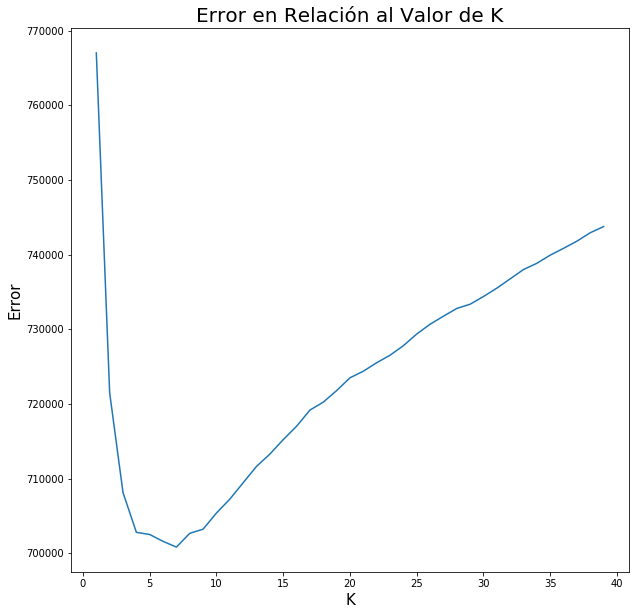

In [225]:
#Ploteamos para ver una mejor representacion
plt.subplots(figsize=(10,10))
plt.plot(rango_k,metricas)
plt.title("Error en Relación al Valor de K",fontsize=20)
plt.xlabel("K",fontsize=15)
plt.ylabel("Error",fontsize=15)

In [226]:
knn = KNeighborsRegressor(n_neighbors=7,algorithm='kd_tree',metric='manhattan')

In [227]:
knn.fit(datos_train,precio_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform')

In [228]:
prediccion_knn=knn.predict(test_final)

In [229]:
entregable_knn=IDS[['id']].copy()
entregable_knn['target']=prediccion_knn
entregable_knn.set_index('id',inplace=True)
entregable_knn.head()

,target
id,
4941,2.309286e+06
51775,8.404429e+05
115253,8.921429e+05
299321,9.270000e+05
173570,5.443257e+05


In [230]:
entregable_knn.to_csv('KNN_10.csv')

### 2.3) Ada Boosting

In [231]:
ada = AdaBoostRegressor()

In [232]:
ada.fit(datos_train,precio_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [233]:
prediccion_ada_validacion=ada.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_ada_validacion))

Mean Absolute Error:  1605546.006314099


In [234]:
prediccion_ada=ada.predict(test_final)

In [235]:
entregable_ada=IDS[['id']].copy()
entregable_ada['target']=prediccion_ada
entregable_ada.set_index('id',inplace=True)
entregable_ada.head()

,target
id,
4941,4.970509e+06
51775,1.663755e+06
115253,2.849722e+06
299321,1.802569e+06
173570,1.016462e+06


In [270]:
entregable_ada.to_csv('ADA_02.csv')

### 2.4) Ridge

In [236]:
ridge = Ridge()

In [237]:
ridge.fit(datos_train,precio_train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.310281099820765e-20 / 1.1102230246251565e-16
  RuntimeWarning)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [238]:
prediccion_ridge_validacion=ridge.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_ridge_validacion))

Mean Absolute Error:  871765.492909066


### 2.5) Lasso

In [239]:
lasso = Lasso(alpha=1000,positive=True)

In [240]:
lasso.fit(datos_train,precio_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=True, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [241]:
prediccion_lasso_validacion=lasso.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_lasso_validacion))

Mean Absolute Error:  882965.6750017604


### 2.6) Bagging

In [242]:
bagging = BaggingRegressor(KNeighborsRegressor(n_neighbors=7,algorithm='kd_tree',metric='manhattan'))

In [243]:
bagging.fit(datos_train,precio_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [244]:
prediccion_bagging_validacion=bagging.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_bagging_validacion))

Mean Absolute Error:  697827.1045921046


In [245]:
prediccion_bagging=bagging.predict(test_final)

In [246]:
entregable_bagging=IDS[['id']].copy()
entregable_bagging['target']=prediccion_bagging
entregable_bagging.set_index('id',inplace=True)
entregable_bagging.head()

,target
id,
4941,2.113571e+06
51775,8.627243e+05
115253,8.320429e+05
299321,1.333486e+06
173570,5.730954e+05


In [247]:
entregable_bagging.to_csv('BAGGING_03.csv')

### 2.7) Extra Tree Regressor

In [248]:
extra_tree = ExtraTreesRegressor(n_estimators=100,criterion='mse',bootstrap=True,n_jobs=-1)

In [249]:
extra_tree.fit(datos_train,precio_train)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [250]:
prediccion_extra_tree_validacion=extra_tree.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_extra_tree_validacion))

Mean Absolute Error:  573844.677431744


In [251]:
prediccion_extra_tree=extra_tree.predict(test_final)

In [252]:
entregable_extra_tree=IDS[['id']].copy()
entregable_extra_tree['target']=prediccion_extra_tree
entregable_extra_tree.set_index('id',inplace=True)
entregable_extra_tree.head()

,target
id,
4941,2855921.41
51775,1090936.38
115253,2062208.00
299321,2316261.50
173570,589720.00


In [253]:
entregable_extra_tree.to_csv('EXTRA_TREE_03.csv')

### 2.8) XGBoosting

In [254]:
xgboost = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 100)

In [255]:
xgboost.fit(datos_train,precio_train)

[14:24:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [256]:
prediccion_xgboost_validacion=xgboost.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_xgboost_validacion))

Mean Absolute Error:  690800.2724470537


### 2.9) Linear Regression

In [258]:
linear = LinearRegression()

In [259]:
linear.fit(datos_train,precio_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [260]:
prediccion_linear_validacion=linear.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_linear_validacion))

Mean Absolute Error:  871858.1542507734


### 2.10) ElasticNet Regression

In [262]:
elastic = ElasticNet(alpha=1000)

In [263]:
elastic.fit(datos_train,precio_train)

ElasticNet(alpha=1000, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [264]:
prediccion_elastic_validacion=elastic.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_elastic_validacion))

Mean Absolute Error:  1076002.0841305715


### 2.11) SVR

In [239]:
svr = SVR()

In [240]:
svr.fit(datos_train,precio_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [241]:
prediccion_svr_validacion=svr.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_svr_validacion))

Mean Absolute Error:  1394389.449396431


In [243]:
prediccion_svr=svr.predict(test_final)

In [244]:
entregable_svr=IDS[['id']].copy()
entregable_svr['target']=prediccion_svr
entregable_svr.set_index('id',inplace=True)
entregable_svr.head()

,target
id,
4941,1.550001e+06
51775,1.550001e+06
115253,1.550001e+06
299321,1.550001e+06
173570,1.550001e+06


In [245]:
entregable_svr.to_csv('SVR_02.csv')

### 2.12) Random Forest

In [265]:
random = RandomForestRegressor(random_state=0, n_jobs=-1, n_estimators=100)

In [266]:
random.fit(datos_train,precio_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [267]:
prediccion_random_validacion=random.predict(datos_test)

print('Mean Absolute Error: ',mean_absolute_error(precio_test,prediccion_random_validacion))

Mean Absolute Error:  545782.1999848131


In [268]:
prediccion_random=random.predict(test_final)

In [269]:
entregable_random=IDS[['id']].copy()
entregable_random['target']=prediccion_random
entregable_random.set_index('id',inplace=True)
entregable_random.head()

,target
id,
4941,3393632.00
51775,1022733.65
115253,1893288.21
299321,1251689.53
173570,545970.00


In [270]:
entregable_random.to_csv('RANDOM_03.csv')